In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
from sklearn.model_selection import train_test_split
X = diabetes.drop(['Outcome'],axis=1)
y = diabetes['Outcome']

from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X = ss_X.fit_transform(X)
X.shape

(768, 8)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=666)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

### defaut Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

D:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
lr = LogisticRegression()
loss = cross_val_score(lr,X_train,y_train,cv=5,scoring='neg_log_loss')
-loss,-loss.mean()

(array([0.49027529, 0.47391176, 0.52748015, 0.50581481, 0.50235391]),
 0.4999671843242302)

### GridSearchCV

In [7]:
penaltys = ['l1','l2']
Cs = [0.001,0.01,0.1,1,10,100,1000]
param_grid = dict(penalty=penaltys,C=Cs)

lr_grid = LogisticRegression()
grid = GridSearchCV(lr_grid,param_grid,cv=5,scoring='neg_log_loss')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [8]:
grid.cv_results_

D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Program Files\Anaconda3\lib\site-packages\skle

{'mean_fit_time': array([0.00140033, 0.00160012, 0.00130033, 0.00260019, 0.002     ,
        0.00190063, 0.00210009, 0.00230012, 0.0019999 , 0.00199957,
        0.00189939, 0.00200033, 0.00220032, 0.0019001 ]),
 'std_fit_time': array([5.83044855e-04, 2.00224008e-04, 2.44308624e-04, 8.00252193e-04,
        3.15677817e-04, 1.99771859e-04, 2.00224008e-04, 3.99577663e-04,
        7.89305942e-07, 2.33601546e-07, 2.01177682e-04, 4.47501371e-04,
        2.44543062e-04, 3.74011188e-04]),
 'mean_score_time': array([0.00099993, 0.00100017, 0.00100002, 0.00120029, 0.00110059,
        0.00120077, 0.00120029, 0.00140052, 0.00110049, 0.00090079,
        0.0009006 , 0.00100079, 0.00150094, 0.00100036]),
 'std_score_time': array([3.16280483e-04, 3.37174788e-07, 7.77697870e-07, 2.44817113e-04,
        1.99771119e-04, 4.00614891e-04, 3.99781041e-04, 3.74495603e-04,
        5.83854484e-04, 1.99938190e-04, 2.00200613e-04, 3.16280325e-04,
        7.75372169e-04, 3.16581896e-04]),
 'param_C': masked_array(d

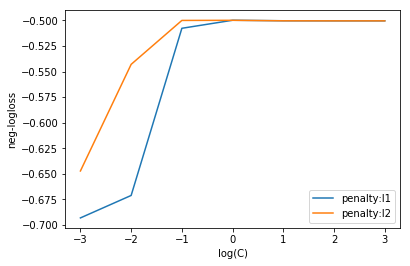

In [9]:
test_means = grid.cv_results_['mean_test_score']
test_std = grid.cv_results_['std_test_score']

test_scores = np.array(test_means).reshape(len(Cs),len(penaltys))
X_axis = np.log10(Cs)
for i,value in enumerate(penaltys):
    plt.plot(X_axis,test_scores[:,i],label='penalty:'+str(value))

plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'neg-logloss' )
plt.show()

In [10]:
#最佳score和最佳参数
grid.best_score_,grid.best_params_

(-0.49987554399449835, {'C': 1, 'penalty': 'l1'})

### L1正则

In [11]:

from sklearn.linear_model import LogisticRegressionCV

Cs = [1,10,100,1000]

lrcv_L1 = LogisticRegressionCV(Cs=Cs,cv=5,scoring='neg_log_loss',penalty='l1',solver='liblinear',multi_class='ovr')
lrcv_L1.fit(X_train,y_train)

LogisticRegressionCV(Cs=[1, 10, 100, 1000], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

In [12]:
lrcv_L1.scores_

{1: array([[-0.49126577, -0.49009975, -0.48998555, -0.4899772 ],
        [-0.47265663, -0.47378225, -0.47392235, -0.47393658],
        [-0.52611627, -0.52895352, -0.52926389, -0.52929187],
        [-0.50685858, -0.50640353, -0.5063734 , -0.5063744 ],
        [-0.5026424 , -0.50284811, -0.50288917, -0.50289417]])}

In [13]:
n_Cs=len(Cs)
n_classes = 1
scores = -np.mean(lrcv_L1.scores_[1],axis=0)

plt.plot(np.log10(Cs), scores) 
plt.xlabel('log(C)')
plt.ylabel('neg-logloss')
plt.show()

### L2正则

In [14]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [1,10,100,1000]

lrcv_L2 = LogisticRegressionCV(Cs=Cs,cv=5,scoring='neg_log_loss',penalty='l2',solver='liblinear',multi_class='ovr')
lrcv_L2.fit(X_train,y_train)

LogisticRegressionCV(Cs=[1, 10, 100, 1000], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

In [15]:
lrcv_L2.scores_

{1: array([[-0.49027529, -0.48999928, -0.48997589, -0.4899736 ],
        [-0.47391176, -0.47392657, -0.47393375, -0.47393453],
        [-0.52748015, -0.5291026 , -0.52927971, -0.52929758],
        [-0.50581481, -0.50631   , -0.50636766, -0.50637352],
        [-0.50235391, -0.50283215, -0.50288768, -0.50289332]])}

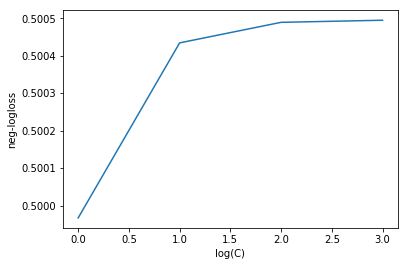

In [16]:
n_Cs=len(Cs)
n_classes = 1
scores = -np.mean(lrcv_L2.scores_[1],axis=0)

plt.plot(np.log10(Cs), scores) 
plt.xlabel('log(C)')
plt.ylabel('neg-logloss')
plt.show()